Assignment: Create a jupyter notebook called assignment2-weather.ipynb that has a nice plot of the temperature over time 

Importing the librarires we will be using for this assignment.

In [103]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
#from matplotlib.ticker import MaxNLocator

Read in the CSV as a pandas table

In [9]:
FILENAME= "weatherreadings1.csv"

df = pandas.read_csv(FILENAME)

Check the data now that it is read in: print the top 5 rows.

In [8]:
df.head()

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


Check some general information on our data set:

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

,collectionName,observationType,windDirection,relativeHumidity,windSpeed_MilePerHour,windSpeed_MetrePerSecond,dryBulbTemperature_Fahrenheit,dryBulbTemperature_Celsius,wetBulbTemperature_Fahrenheit,wetBulbTemperature_Celsius,...,airPressure_InchOfMercury,airPressure_Hectopascal,dewPointTemperature_Fahrenheit,dewPointTemperature_Celsius,longitude,latitude,height,externalSiteId,version,externalId
count,89.0,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,8.900000e+01,8.900000e+01,89.0,8.900000e+01,89.0,8.900000e+01
mean,1.0,1.0,188.292135,85.135955,2.866067,1.281245,53.030337,11.683521,50.375281,10.208489,...,29.962416,1014.643950,48.606742,9.225968,-8.854500e+00,5.352440e+01,45.0,1.000013e+09,1.0,1.257823e+10
std,0.0,0.0,144.536579,5.626101,2.637010,1.178847,3.373102,1.873946,2.165236,1.202909,...,0.036299,1.229232,1.627240,0.904022,1.786421e-15,5.716548e-14,0.0,0.000000e+00,0.0,3.879131e+05
min,1.0,1.0,0.000000,70.400000,0.000000,0.000000,48.500000,9.166667,47.200000,8.444444,...,29.867000,1011.412803,46.000000,7.777778,-8.854500e+00,5.352440e+01,45.0,1.000013e+09,1.0,1.257757e+10
25%,1.0,1.0,40.000000,79.900000,1.000000,0.447039,50.500000,10.277778,48.800000,9.333333,...,29.947000,1014.121914,47.400000,8.555556,-8.854500e+00,5.352440e+01,45.0,1.000013e+09,1.0,1.257790e+10
50%,1.0,1.0,275.000000,87.200000,2.000000,0.894079,51.500000,10.833333,49.600000,9.777778,...,29.963000,1014.663736,48.300000,9.055556,-8.854500e+00,5.352440e+01,45.0,1.000013e+09,1.0,1.257824e+10
75%,1.0,1.0,333.000000,89.400000,3.750000,1.676397,55.800000,13.222222,52.000000,11.111111,...,29.991000,1015.611925,49.600000,9.777778,-8.854500e+00,5.352440e+01,45.0,1.000013e+09,1.0,1.257857e+10
max,1.0,1.0,359.000000,92.400000,14.250000,6.370309,60.700000,15.944444,54.700000,12.611111,...,30.015000,1016.424658,51.800000,11.000000,-8.854500e+00,5.352440e+01,45.0,1.000013e+09,1.0,1.257889e+10


To plot temparuture over time, we are dealing with pairwise data. Let's choose 'reportStartDaterTime' as the basis for our time values, and use min and max to understand the time horizon we are dealing with.

In [23]:
mintime = min(df['reportStartDateTime'])
print (mintime)

maxtime = max(df['reportStartDateTime'])
print (maxtime)

2024-10-02T16:15:00+00:00
2024-10-03T15:00:00+00:00


We are plotting temparture readings taken from 16:15 on Oct 2nd 2024 through to 15:00 on Oct 23rd 2024 (22 hour 45 minute time horizon). Given 15 minute intervals, we should have 91 readings in total. We have 89 on record so two readings are missing. 

Let's plot the data on a line plot, with time ("reportStartDateTime") on the x-axis and temperature ( "dryBulbTemperature_Celsius" ) on the y-axis.

Template code taken from: https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py

In [40]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


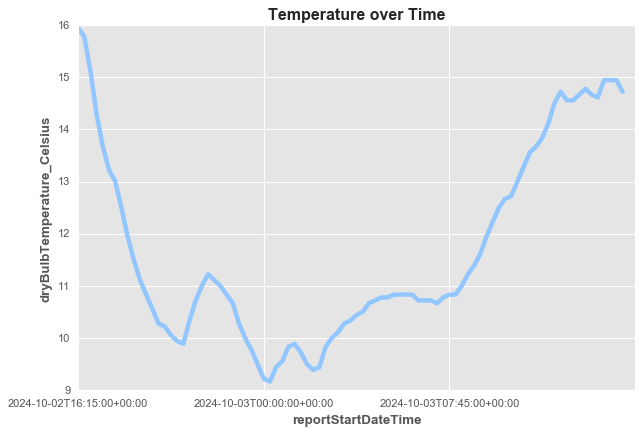

In [125]:
#plt.style.use('Solarize_Light2')
#plt.style.use('_classic_test_patch')
#plt.style.use('bmh')
#plt.style.use('classic')
#plt.style.use('dark_background')
#plt.style.use('fast')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('grayscale')
#plt.style.use('seaborn-v0_8')
#plt.style.use('seaborn-v0_8-bright')
#plt.style.use('seaborn-v0_8-colorblind')
#plt.style.use('seaborn-v0_8-dark')
#plt.style.use('seaborn-v0_8-dark-palette')
#plt.style.use('seaborn-v0_8-darkgrid')
#plt.style.use('seaborn-v0_8-deep')
#plt.style.use('seaborn-v0_8-muted')
#plt.style.use('seaborn-v0_8-notebook')
#plt.style.use('seaborn-v0_8-paper')
plt.style.use('seaborn-v0_8-pastel')
#plt.style.use('seaborn-v0_8-poster')
#plt.style.use('seaborn-v0_8-talk')
#plt.style.use('seaborn-v0_8-ticks')
#plt.style.use('seaborn-v0_8-white')
#plt.style.use('seaborn-v0_8-whitegrid')
#plt.style.use('tableau-colorblind10')

x = df['reportStartDateTime']
y = df['dryBulbTemperature_Celsius']

# plot
fig, ax = plt.subplots()

# Title.
ax.set_title('Temperature over Time', weight='bold')

# Axis labels.
ax.set_xlabel('reportStartDateTime', weight='bold')
ax.set_ylabel('dryBulbTemperature_Celsius', weight ='bold')



#ax.plot(x, y, 'x', markeredgewidth=2)
ax.plot(x, y, linewidth=4.0)
loc = plticker.MultipleLocator(base=30.0) # this locator puts ticks at regular intervals
# Reference: https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-the-x-or-y-axis
ax.xaxis.set_major_locator(loc)

plt.show()